## Visualize Clusters

### Revision

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("mall_customers_loadsheet.csv")
# print(df.head())
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
# print(X.head())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]
from sklearn.cluster import KMeans
inertia_values = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,random_state = 42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
# print(inertia_values)
import matplotlib.pyplot as plt
# plt.plot(range(1,11),inertia_values,marker='o')
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Inertia")
# plt.title("Elbow Curve for K-Means")
# plt.savefig("Images/elbow_curve.png", dpi=300, bbox_inches="tight")
# plt.show()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca[:5]

pca.explained_variance_ratio_

from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

import pandas as pd

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

pca_df["Cluster"] = clusters

pca_df.head()


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# # plt.scatter(
#     pca_df["PC1"],
#     pca_df["PC2"],
#     c=pca_df["Cluster"],
#     cmap="viridis"
# )
# plt.xlabel("Principal Component 1 (PC1)")
# plt.ylabel("Principal Component 2 (PC2)")
# plt.title("Customer Clusters (PCA - 2D View)")
# plt.colorbar(label="Cluster")

plt.savefig("Images/pca_clusters_2d.png", dpi=300, bbox_inches="tight")
# plt.show()

<Figure size 800x600 with 0 Axes>

### Topic 1: Scatter Plot of PC1 vs PC2

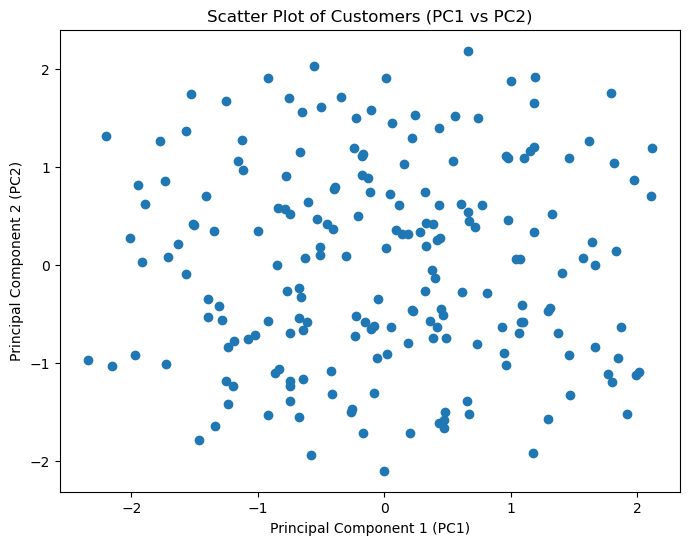

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'] 
)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("Scatter Plot of Customers (PC1 vs PC2)")
plt.savefig("Images/ScatterPlot.png", dpi=300, bbox_inches="tight")
plt.show()

### Topic 2: Color points by cluster label

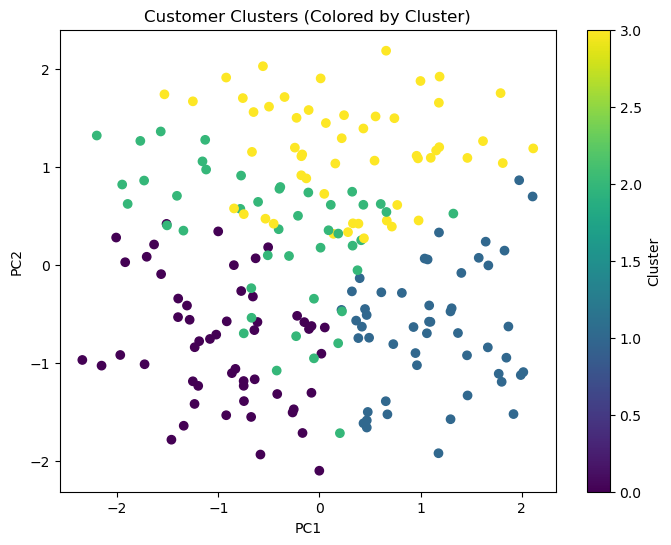

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["Cluster"],
    cmap="viridis"
)
# plt.colormaps()

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Clusters (Colored by Cluster)")
plt.colorbar(label="Cluster")
plt.savefig("Images/CustomerClusterPlot.png", dpi=300, bbox_inches="tight")
plt.show()

### Topic 3 : Plot centroids as large red “X”

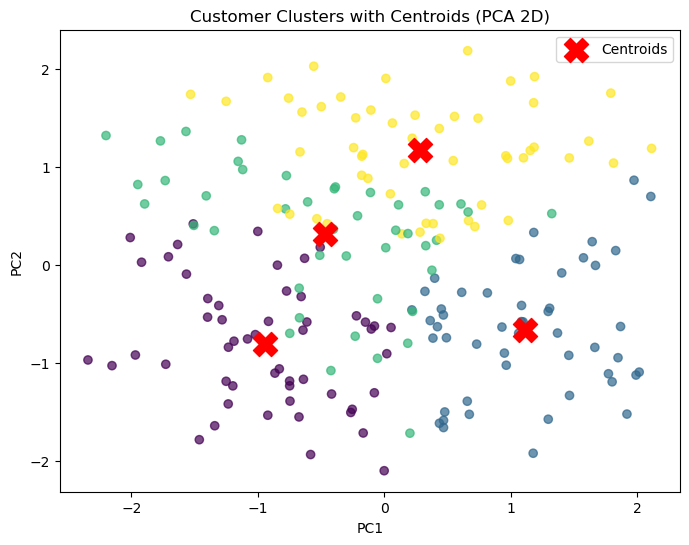

In [41]:
### Step 1: Get centroids from K-Means
centroids_scaled = kmeans_final.cluster_centers_
### Step 2: Transform centroids using PCA
centroids_pca = pca.transform(centroids_scaled)
### Step 3: Plot clusters + centroids together
plt.figure(figsize=(8, 6))

# Plot customers
plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["Cluster"],
    cmap="viridis",
    alpha=0.7
)

# Plot centroids
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c="red",
    s=300,
    marker="X",
    label="Centroids"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Clusters with Centroids (PCA 2D)")
plt.legend()
plt.savefig("Images/CustomerClusterPlotWithCentroids.png", dpi=300, bbox_inches="tight")
plt.show()
